In [137]:
'''
convnet from scratch in python
but first we're building a linear net from scratch
'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
np.random.seed(0)
train, test = tf.keras.datasets.cifar10.load_data()
x_train, y_train = train[0], train[1]
x_test, y_test = test[0], test[1]

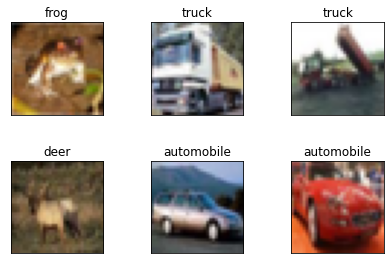

In [117]:
def sample_images(n_rows, n_cols):
    #create a grid of sample images with labels from the train dataset
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    f, axarr = plt.subplots(n_rows,n_cols)
    f.tight_layout()
    for i in range(n_rows):
        for j in range(n_cols):
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].imshow(x_train[i*n_cols + j])
            axarr[i,j].set_title(labels[y_train[i*n_cols + j][0]])
sample_images(2, 3)

In [307]:
def convolve(x, f):
    fr, fc, d, n = f.shape
    xr, xc = x.shape[0], x.shape[1]
    x = np.pad(x, ((2, 2), (2, 2), (0, 0)))
    result = np.zeros((xr, xr, n))
    for r in range(xr):
        for c in range(xc):
            result[r, c] = np.dot(x[r:r+fr, c:c+fc].reshape((1, -1)), (f.reshape((-1,n))))
    print(result.shape)
    return result

def maxpool(x):
    xr, xc, d = x.shape
    pr = xr // 2
    pc = xc // 2
    result = np.zeros((pr, pc, d))
    for r in range(pr):
        for c in range(pc):
            result[r, c] = np.max(x[r:r+2, c:c+2])
    print(result.shape)
    return result

def forward(x, y):
    #forward pass
    c1 = convolve(x, f1)
    r1 = np.maximum(c1, .0001)
    p1 = maxpool(r1)
    c2 = convolve(p1, f2)
    r2 = np.maximum(c2, .0001)
    p2 = maxpool(r2)
    c3 = convolve(p2, f3)
    r3 = np.maximum(c3, .0001)
    p3 = maxpool(r3)
    fc = np.dot(p3.reshape((1, -1)), fcl)[0]
    print(fc)
    softmax = np.exp(fc) / np.sum(np.exp(fc))
    print(softmax, np.sum(softmax))
    correct = np.zeros(10)
    correct[y] = 1
    loss = softmax - correct
    print(loss)
    
    #backprop
    
    return 1, 2, 3, 4

def layer_init(r, c, d, n):
    #create a filter with weights initialized to the square root of the product of the dimensions
    return np.random.uniform(-1, 1, (r, c, d, n)) / np.sqrt(r * c * d)

In [310]:
f1 = layer_init(5, 5, 3, 16)
f2 = layer_init(5, 5, 16, 20)
f3 = layer_init(5, 5, 20, 20)
fcl = layer_init(320, 10, 1, 1)[:, :, 0, 0]
lr = .01

for i in range(1):
    samp = np.random.randint(0, 50000)
    x, y = x_train[samp], y_train[samp]
    d_f1, d_f2, d_f3, d_fcl = forward(x, y)
    f1 = f1 - lr*d_f1
    f2 = f2 - lr*d_f2
    f3 = f3 - lr*d_f3
    fcl = fcl - lr*d_fcl

(32, 32, 16)
(16, 16, 16)
(16, 16, 20)
(8, 8, 20)
(8, 8, 20)
(4, 4, 20)
[  5.5409818  -40.46767966 -27.45598599 -32.77364179 -11.56422724
 -47.17142808 -13.46103809 -11.73932219  46.71336311  20.91312578]
[1.31541259e-18 1.37326452e-38 6.14696811e-33 3.01461870e-35
 4.90189602e-26 1.68404330e-41 7.35511737e-27 4.11454032e-26
 1.00000000e+00 6.23877463e-12] 1.0
[ 1.31541259e-18  1.37326452e-38  6.14696811e-33 -1.00000000e+00
  4.90189602e-26  1.68404330e-41  7.35511737e-27  4.11454032e-26
  1.00000000e+00  6.23877463e-12]


In [156]:
convolve

AttributeError: 'list' object has no attribute 'shape'

In [145]:
samp[60]

20524

In [210]:
j = np.ones((36, 36, 3)) * -1

In [200]:
j[0:5][0:5].shape

(5, 36, 3)

In [211]:
z = np.maximum(j, 0)

In [232]:
a, b, c = z.shape /2.0

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

In [233]:
z.shape

(36, 36, 3)

In [225]:
g = np.arange(4).reshape(2, -1)

In [229]:
np.max(g)

3

In [238]:
layer_init(320, 10, 1, 1)[:, :, 0, 0].shape

(320, 10)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [260]:
sum(np.ones((1, 10)))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])